In [37]:
# import math
# import numpy as np
# import torch
# from torch import nn
# from d2l import torch as d2l

In [38]:
# max_degree = 20  # 多项式的最大阶数
# n_train, n_test = 100, 100  # 训练和测试数据集大小
# true_w = np.zeros(max_degree)  # 分配大量的空间
# true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

# features = np.random.normal(size=(n_train + n_test, 1))
# np.random.shuffle(features)
# poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
# for i in range(max_degree):
#     poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# # labels的维度:(n_train+n_test,)
# labels = np.dot(poly_features, true_w)
# labels += np.random.normal(scale=0.1, size=labels.shape)

In [39]:
# # NumPy ndarray转换为tensor
# true_w, features, poly_features, labels = [torch.tensor(x, dtype=
#     torch.float32) for x in [true_w, features, poly_features, labels]]

# features[:2], poly_features[:2, :], labels[:2]

In [40]:
# def evaluate_loss(net, data_iter, loss):  #@save
#     """评估给定数据集上模型的损失"""
#     metric = d2l.Accumulator(2)  # 损失的总和,样本数量
#     for X, y in data_iter:
#         out = net(X)
#         y = y.reshape(out.shape)
#         l = loss(out, y)
#         metric.add(l.sum(), l.numel())
#     return metric[0] / metric[1]

In [41]:
# def train(train_features, test_features, train_labels, test_labels,
#           num_epochs=400):
#     loss = nn.MSELoss(reduction='none')
#     input_shape = train_features.shape[-1]
#     # 不设置偏置，因为我们已经在多项式中实现了它
#     net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
#     batch_size = min(10, train_labels.shape[0])
#     train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
#                                 batch_size)
#     test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
#                                batch_size, is_train=False)
#     trainer = torch.optim.SGD(net.parameters(), lr=0.01)
#     animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
#                             xlim=[1, num_epochs], ylim=[1e-3, 1e2],
#                             legend=['train', 'test'])
#     for epoch in range(num_epochs):
#         d2l.train_epoch_ch3(net, train_iter, loss, trainer)
#         if epoch == 0 or (epoch + 1) % 20 == 0:
#             animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
#                                      evaluate_loss(net, test_iter, loss)))
#     print('weight:', net[0].weight.data.numpy())

In [42]:
# # 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
# train(poly_features[:n_train, :4], poly_features[n_train:, :4],
#       labels[:n_train], labels[n_train:])

In [43]:
# # 从多项式特征中选择前2个维度，即1和x
# train(poly_features[:n_train, :2], poly_features[n_train:, :2],
#       labels[:n_train], labels[n_train:])

In [44]:
# # 从多项式特征中选取所有维度
# train(poly_features[:n_train, :], poly_features[n_train:, :],
#       labels[:n_train], labels[n_train:], num_epochs=1500)

In [16]:
import math
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [17]:
# 设置超参数
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

# 生成数据
features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [26]:
# NumPy ndarray 转换为 tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

# 查看前两行数据
features[:2], poly_features[:2, :], labels[:2]

C:\Users\admin\AppData\Local\Temp\ipykernel_16732\1823071441.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]


(tensor([[0.0215],
         [0.3797]]),
 tensor([[1.0000e+00, 2.1496e-02, 2.3104e-04, 1.6554e-06, 8.8963e-09, 3.8247e-11,
          1.3702e-13, 4.2078e-16, 1.1306e-18, 2.7004e-21, 5.8048e-24, 1.1344e-26,
          2.0320e-29, 3.3600e-32, 5.1590e-35, 7.3931e-38, 9.9325e-41, 1.2612e-43,
          0.0000e+00, 0.0000e+00],
         [1.0000e+00, 3.7973e-01, 7.2096e-02, 9.1255e-03, 8.6630e-04, 6.5791e-05,
          4.1638e-06, 2.2587e-07, 1.0721e-08, 4.5234e-10, 1.7177e-11, 5.9294e-13,
          1.8763e-14, 5.4806e-16, 1.4865e-17, 3.7631e-19, 8.9310e-21, 1.9949e-22,
          4.2084e-24, 8.4107e-26]]),
 tensor([5.1158, 5.2028]))

In [27]:
# 评估损失
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失"""
    metric = [0.0, 0]  # 损失的总和, 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric[0] += l.sum().item()
        metric[1] += l.numel()
    return metric[0] / metric[1]

In [31]:
# 训练函数
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    
    # 自定义加载数据
    train_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_features, train_labels.reshape(-1,1)),
                                             batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_features, test_labels.reshape(-1,1)),
                                            batch_size=batch_size, shuffle=False)

    trainer = torch.optim.SGD(net.parameters(), lr=0.01)

    # 使用 matplotlib 显示训练过程
    train_loss_list = []
    test_loss_list = []

    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()  # 对平均损失进行反向传播
            trainer.step()

        # 每20个epoch，记录损失
        if (epoch + 1) % 20 == 0:
            train_loss = evaluate_loss(net, train_iter, loss)
            test_loss = evaluate_loss(net, test_iter, loss)
            train_loss_list.append(train_loss)
            test_loss_list.append(test_loss)
            
            # 打印日志
            print(f"Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

    # 最终输出的训练与测试损失图
    plt.plot(range(1, num_epochs + 1, 20), train_loss_list, label='Train Loss')
    plt.plot(range(1, num_epochs + 1, 20), test_loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.yscale('log')
    plt.show()

    # 输出训练后的权重
    print('Weight:', net[0].weight.data.numpy())

In [29]:
# 使用多项式特征进行训练

Epoch 20: Train Loss = 0.8038, Test Loss = 1.1715
Epoch 40: Train Loss = 0.1961, Test Loss = 0.7817
Epoch 60: Train Loss = 0.0946, Test Loss = 0.4914
Epoch 80: Train Loss = 0.0531, Test Loss = 0.2815
Epoch 100: Train Loss = 0.0323, Test Loss = 0.1596
Epoch 120: Train Loss = 0.0216, Test Loss = 0.0926
Epoch 140: Train Loss = 0.0160, Test Loss = 0.0564
Epoch 160: Train Loss = 0.0132, Test Loss = 0.0370
Epoch 180: Train Loss = 0.0117, Test Loss = 0.0260
Epoch 200: Train Loss = 0.0109, Test Loss = 0.0200
Epoch 220: Train Loss = 0.0105, Test Loss = 0.0165
Epoch 240: Train Loss = 0.0103, Test Loss = 0.0145
Epoch 260: Train Loss = 0.0102, Test Loss = 0.0132
Epoch 280: Train Loss = 0.0102, Test Loss = 0.0125
Epoch 300: Train Loss = 0.0101, Test Loss = 0.0120
Epoch 320: Train Loss = 0.0101, Test Loss = 0.0117
Epoch 340: Train Loss = 0.0101, Test Loss = 0.0115
Epoch 360: Train Loss = 0.0101, Test Loss = 0.0113
Epoch 380: Train Loss = 0.0101, Test Loss = 0.0112
Epoch 400: Train Loss = 0.0101, Tes

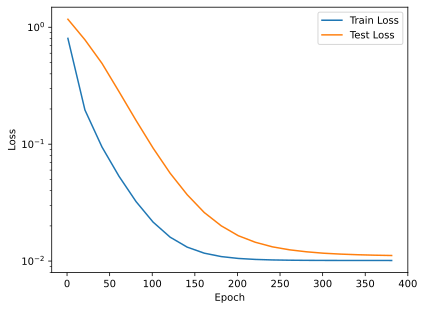

Weight: [[ 5.013408   1.2238849 -3.4125214  5.566914 ]]


In [32]:
# 从多项式特征中选择前4个维度，即1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

Epoch 20: Train Loss = 17.3399, Test Loss = 8.0967
Epoch 40: Train Loss = 17.3059, Test Loss = 8.6516
Epoch 60: Train Loss = 17.3060, Test Loss = 8.7173
Epoch 80: Train Loss = 17.3061, Test Loss = 8.6177
Epoch 100: Train Loss = 17.3070, Test Loss = 8.8146
Epoch 120: Train Loss = 17.3073, Test Loss = 8.8572
Epoch 140: Train Loss = 17.3061, Test Loss = 8.7617
Epoch 160: Train Loss = 17.3059, Test Loss = 8.7227
Epoch 180: Train Loss = 17.3062, Test Loss = 8.7619
Epoch 200: Train Loss = 17.3059, Test Loss = 8.7044
Epoch 220: Train Loss = 17.3063, Test Loss = 8.7872
Epoch 240: Train Loss = 17.3073, Test Loss = 8.5294
Epoch 260: Train Loss = 17.3064, Test Loss = 8.7814
Epoch 280: Train Loss = 17.3063, Test Loss = 8.7875
Epoch 300: Train Loss = 17.3058, Test Loss = 8.6918
Epoch 320: Train Loss = 17.3059, Test Loss = 8.7072
Epoch 340: Train Loss = 17.3059, Test Loss = 8.7114
Epoch 360: Train Loss = 17.3063, Test Loss = 8.7851
Epoch 380: Train Loss = 17.3062, Test Loss = 8.6089
Epoch 400: Train

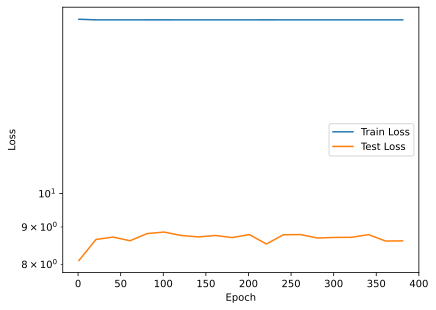

Weight: [[3.281881  5.1576176]]


In [35]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

Epoch 20: Train Loss = 0.4428, Test Loss = 1.5851
Epoch 40: Train Loss = 0.1350, Test Loss = 1.6208
Epoch 60: Train Loss = 0.1051, Test Loss = 1.3580
Epoch 80: Train Loss = 0.0911, Test Loss = 1.0982
Epoch 100: Train Loss = 0.0815, Test Loss = 0.8950
Epoch 120: Train Loss = 0.0741, Test Loss = 0.7440
Epoch 140: Train Loss = 0.0680, Test Loss = 0.6268
Epoch 160: Train Loss = 0.0627, Test Loss = 0.5357
Epoch 180: Train Loss = 0.0580, Test Loss = 0.4600
Epoch 200: Train Loss = 0.0538, Test Loss = 0.3960
Epoch 220: Train Loss = 0.0500, Test Loss = 0.3444
Epoch 240: Train Loss = 0.0465, Test Loss = 0.2976
Epoch 260: Train Loss = 0.0433, Test Loss = 0.2591
Epoch 280: Train Loss = 0.0405, Test Loss = 0.2254
Epoch 300: Train Loss = 0.0378, Test Loss = 0.1959
Epoch 320: Train Loss = 0.0355, Test Loss = 0.1699
Epoch 340: Train Loss = 0.0333, Test Loss = 0.1468
Epoch 360: Train Loss = 0.0313, Test Loss = 0.1274
Epoch 380: Train Loss = 0.0295, Test Loss = 0.1103
Epoch 400: Train Loss = 0.0278, Tes

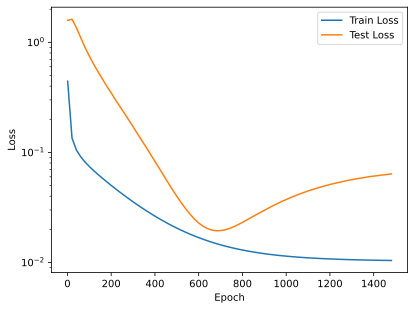

Weight: [[ 5.0117607e+00  1.3096392e+00 -3.4110968e+00  5.1256356e+00
   5.0714947e-03  1.1934092e+00  3.3606729e-01  1.8147942e-01
   3.8945939e-02  2.5714053e-02  6.0317054e-02 -8.1437819e-02
   1.9110809e-01  1.9672042e-01  1.2002748e-01  1.7957309e-02
  -8.4330909e-02 -1.1610125e-01  2.1573329e-01  1.9151413e-01]]


In [36]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)